---

# Regressão Linear

#### Grupo: Isadora Dalberto, Lais da Silva, Gabriela Moreno e Stephanie Liu

---

## Base Teste

In [64]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

In [65]:
dados = pd.read_excel("HappinessAlcoholConsumption.xls")

In [81]:
X =  dados[['HDI', 'GDP_PerCapita','GDP_PerCapita', 'Beer_PerCapita', 'Spirit_PerCapita','Wine_PerCapita']]
y = dados["HappinessScore"]

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=RANDOM_SEED)

In [155]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((109, 6), (109,), (13, 6), (13,))

## Treinamento

In [156]:
# --------------- Importando biblotecas ---------------
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy.stats import norm, probplot
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats


In [157]:
# --------------- Leitura dos dados ---------------
dados = pd.read_excel("HappinessAlcoholConsumption.xls")

In [158]:
# --------------- Colocando Indice ---------------
dados_indice = dados.set_index("Country")

In [159]:
### Função utilitária para fazer a regressão com constante adicionada
def regress(X,Y):
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    return results

In [160]:
dados_indice.columns

Index(['Region', 'Hemisphere', 'HappinessScore', 'HDI', 'GDP_PerCapita',
       'Beer_PerCapita', 'Spirit_PerCapita', 'Wine_PerCapita'],
      dtype='object')

### Usando as variáveis quantitativas 
HappinessScore, HDI, GDP_PerCapita, Beer_PerCapita, Spirit_PerCapita, Wine_PerCapita

In [161]:
df = dados_indice[['HappinessScore', 'HDI','GDP_PerCapita', 'Beer_PerCapita', 'Spirit_PerCapita','Wine_PerCapita']]

### Variável Dependente e Independente 

* **Dependente(Y):**
Indice de Felicidade (HappinessScore) como resposta (dependente).

* **Independente(X):**
Demais variáveis como explicativas.

## Primeira regressão
* **Variável Independente(X)=** 
todas as variáveis quantitativas

In [162]:
Y = df['HappinessScore']

In [163]:
X = df[['HDI','GDP_PerCapita','Beer_PerCapita','Spirit_PerCapita','Wine_PerCapita']]


In [164]:
results = regress(X,Y)
results.summary()

C:\Users\Gabi_XPS\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         HappinessScore   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     48.55
Date:                Thu, 14 Nov 2019   Prob (F-statistic):           7.05e-27
Time:                        09:34:02   Log-Likelihood:                -120.66
No. Observations:                 122   AIC:                             253.3
Df Residuals:                     116   BIC:                             270.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.4899      0.461      1.063      0.290      -0.423       1.403
HDI                  0.0069      0.001     10.196      0.000       0.006       0.008
GDP_PerCapita        0.0002      0.000      0.672      0.503      -0.000       0.001
Beer_PerCapita       0.0007      0.001      0.912      0.363      -0.001       0.002
Spirit_PerCapita    -0.0014      0.001     -1.655      0.101      -0.003       0.000
Wine_PerCapita      -0.0014      0.001     -1.471      0.144      -0.003       0.000
==============================================================================
Omnibus:                        5.197   Durbin-Watson:                   1.396
Prob(Omnibus):                  0.074   Jarque-Bera (JB):                3.098
Skew:                          -0.185   Prob(JB):                        0.212
Kurtosis:                       2.312   Cond. No.                     5.98e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.98e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Conclusão Primeira regressão
É possivel observar que os valores P (P>|t|) das variáveis GDP_PerCapita e Beer_PerCapita são os maiores, o que nos informa que a probabilidade dessa variável regressora ser relevante para explicar a variavel dependente (Hapiness) é baixa, pois o valor "p" é alto.

## Segunda regressão
* **Variável Independente(X)=** 
Hdi, Spirit_Percapita e Wine_Percapita

In [165]:
X1 = df[['HDI','Spirit_PerCapita','Wine_PerCapita']]

In [166]:
results = regress(X1,Y)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         HappinessScore   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     81.08
Date:                Thu, 14 Nov 2019   Prob (F-statistic):           1.54e-28
Time:                        09:34:02   Log-Likelihood:                -121.28
No. Observations:                 122   AIC:                             250.6
Df Residuals:                     118   BIC:                             261.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.6147      0.357      1.722      0.088      -0.092       1.321
HDI                  0.0069      0.001     12.442      0.000       0.006       0.008
Spirit_PerCapita    -0.0012      0.001     -1.505      0.135      -0.003       0.000
Wine_PerCapita      -0.0010      0.001     -1.197      0.234      -0.003       0.001
==============================================================================
Omnibus:                        5.276   Durbin-Watson:                   1.348
Prob(Omnibus):                  0.072   Jarque-Bera (JB):                3.230
Skew:                          -0.205   Prob(JB):                        0.199
Kurtosis:                       2.317   Cond. No.                     4.54e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.54e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Conclusão Segunda regressão
Ao retirar as variáveis que possuiam o valor P mais alto, foi possível observar que a o valor de R ao quadrado não houve quase mudança e que o valor de P das variáveis Spirit_PerCapita e Wine_PerCapita ainda estão altos compraradas com o valor de 5%. Assim, para uma melhora dessa regressão seria retirar as variáveis com valor P maior que 5% e observar a consequência disso no valor de R ao quadrado.

## Terceira regressão
* **Variável Independente(X)=** 
Hdi

In [167]:
X2 = df[['HDI']]

In [168]:
results = regress(X2,Y)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         HappinessScore   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     237.7
Date:                Thu, 14 Nov 2019   Prob (F-statistic):           3.10e-30
Time:                        09:34:03   Log-Likelihood:                -122.91
No. Observations:                 122   AIC:                             249.8
Df Residuals:                     120   BIC:                             255.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8950      0.306      2.921      0.004       0.288       1.502
HDI            0.0062      0.000     15.416      0.000       0.005       0.007
==============================================================================
Omnibus:                        3.079   Durbin-Watson:                   1.371
Prob(Omnibus):                  0.214   Jarque-Bera (JB):                2.572
Skew:                          -0.242   Prob(JB):                        0.276
Kurtosis:                       2.479   Cond. No.                     3.83e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.83e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Conclusão Terceira regressão
Ao deixar somente o HDI como variável independente, ou seja, sem nenhuma variável relacionada a álcool. Além disso, foi possível observar que mesmo sem nenhuma variável relacionada álcool o valor do r ao quadrado não foi muito alterado. Assim, é possível concluir que as variáveis relacionadas ao consumo de álcool não possuem relação com o índice de felicidade.

# Gráfico de VariáveisXHapiness
A partir dos gráficos a seguir é possível observar a correlação entre cada variável e o índice de felicidade por meio de gráficos.

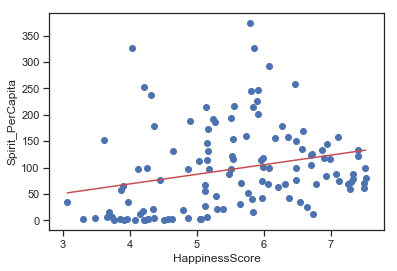

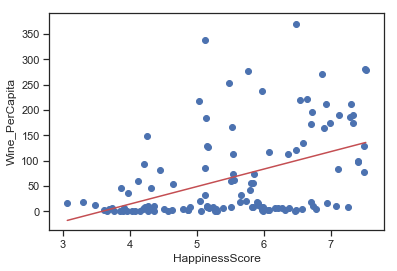

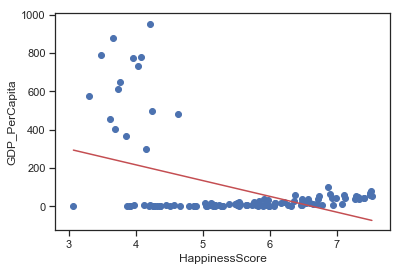

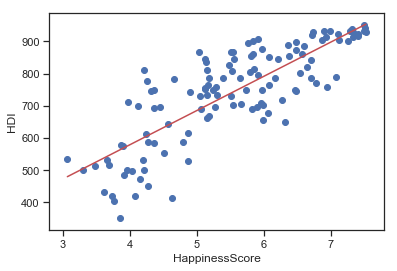

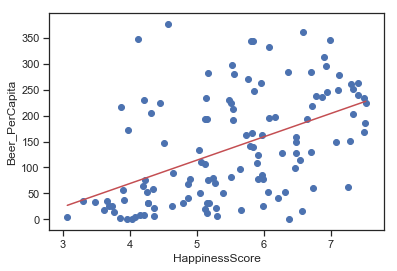

In [169]:
x = df['HappinessScore']
y = df['Spirit_PerCapita']   
yb = y.mean()
xb = x.mean()
Sxy = ((x -xb)*(y -yb)).sum()
Sxx = ((x -xb)**2).sum()
b1 = Sxy/Sxx
b0 = yb - b1*xb
x_v = np.linspace(x.min(), x.max(), 500)
y_v = b0 + b1*x_v
plt.plot(x_v,y_v, color="r") # resultados da regressão
plt.scatter(x, y); # dados
plt.xlabel("HappinessScore");
plt.ylabel("Spirit_PerCapita");
plt.show();


x = df['HappinessScore'] 
y = df['Wine_PerCapita']    
yb = y.mean()
xb = x.mean()
Sxy = ((x -xb)*(y -yb)).sum()
Sxx = ((x -xb)**2).sum()
b1 = Sxy/Sxx
b0 = yb - b1*xb
x_v = np.linspace(x.min(), x.max(), 500)
y_v = b0 + b1*x_v
plt.plot(x_v,y_v, color="r") # resultados da regressão
plt.scatter(x, y); # dados
plt.xlabel("HappinessScore");
plt.ylabel("Wine_PerCapita");
plt.show();

x = df['HappinessScore']
y = df['GDP_PerCapita']    
yb = y.mean()
xb = x.mean()
Sxy = ((x -xb)*(y -yb)).sum()
Sxx = ((x -xb)**2).sum()
b1 = Sxy/Sxx
b0 = yb - b1*xb
x_v = np.linspace(x.min(), x.max(), 500)
y_v = b0 + b1*x_v
plt.plot(x_v,y_v, color="r") # resultados da regressão
plt.scatter(x, y); # dados
plt.xlabel("HappinessScore");
plt.ylabel("GDP_PerCapita");
plt.show();

x = df['HappinessScore'] 
y = df['HDI']   
yb = y.mean()
xb = x.mean()
Sxy = ((x -xb)*(y -yb)).sum()
Sxx = ((x -xb)**2).sum()
b1 = Sxy/Sxx
b0 = yb - b1*xb
x_v = np.linspace(x.min(), x.max(), 500)
y_v = b0 + b1*x_v
plt.plot(x_v,y_v, color="r") # resultados da regressão
plt.scatter(x, y); # dados
plt.xlabel("HappinessScore");
plt.ylabel("HDI");
plt.show();

x = df['HappinessScore'] 
y = df['Beer_PerCapita']    
yb = y.mean()
xb = x.mean()
Sxy = ((x -xb)*(y -yb)).sum()
Sxx = ((x -xb)**2).sum()
b1 = Sxy/Sxx
b0 = yb - b1*xb
x_v = np.linspace(x.min(), x.max(), 500)
y_v = b0 + b1*x_v
plt.plot(x_v,y_v, color="r") # resultados da regressão
plt.scatter(x, y); # dados
plt.xlabel("HappinessScore");
plt.ylabel("Beer_PerCapita");
plt.show();

# Interpretação dos dados
Ao tentar melhorar o desempenho da regressão foi retirado as variáveis com valor de P maiores, depois as variáveis com valor de P maior que 5% e foi possível observar que todas as variáveis que tinham ligação com o álcool foram retiradas, e que o valor de R ao quadrado não obteve uma grande mudança. 

O intuito de retriar as variávei com valor de P altos é devido o fato de quando o valor de P é baixo, quer dizer que a variável regressora é relevante para explicar a variável dependente. Assim, valores de P alto são mais irrelevantes na regressão, o que faz com que o valor de R ao quadrado não mude tanto ao retirar tais variáveis.

Assim, é possível concluir que as variáveis que estão relacionadas com o consumo de álcool foram retiradas da regressão e o valor de R ao quadrado possuiu uma pequena alteração. Desta forma, é possivél concluir que o álcool não possui relação com a felicidade e que a variável HDI é a que possui uma maior influência no índice de felicidade.


# Teste

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_train,y_train)

In [97]:
# y_predict = model.predict(X_test)

In [134]:
y_predict = model.predict(X_test)
y_predict

array([6.43615858, 5.39968522, 5.60648067, 3.44764204, 6.72982633,
       5.0738702 , 5.9324452 , 3.42529359, 5.22831834, 6.53821721,
       6.18927254, 4.2073435 , 6.63512471])

In [179]:
erro=[]
for i,e in zip(y_predict,y_test):
    if i<e:
     diferenca= e-i
     erro.append(diferenca)
    else:
     diferenca= i-e
     erro.append(diferenca)

classificacao=[]
for erros in erro: 
    if erros< 0.5: 
        classfi= 'Certo'
        classificacao.append(classfi)
    else:
        classfi= 'Errado'
        classificacao.append(classfi)

In [189]:
data = {
'Y_predict': y_predict,
'Y_test': y_test,
'Erro': erro, 
'Classificação': classificacao,
}
tabela = pd.DataFrame(data, columns=['Y_predict', 'Y_test','Erro','Classificação'])
tabela

,Y_predict,Y_test,Erro,Classificação
18,6.436159,6.871,0.434841,Certo
45,5.399685,5.956,0.556315,Errado
47,5.606481,5.919,0.312519,Certo
89,3.447642,4.635,1.187358,Errado
4,6.729826,7.413,0.683174,Errado
40,5.073870,6.068,0.994130,Errado
62,5.932445,5.528,0.404445,Certo
107,3.425294,4.028,0.602706,Errado
31,5.228318,6.474,1.245682,Errado
55,6.538217,5.768,0.770217,Errado


In [188]:
contador=0
for c in classificacao: 
    if c == "Certo": 
        contador+=1
acertou=(contador/len(classificacao))*100
print("A regressão linear acertou {0}%".format(acertou))

A regressão linear acertou 30.76923076923077%


# Conclusão

A partir do modelo de regressão linear foi possível obter um acerto de 30,76%.